In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt


start = 8
target = 5
nodes = [(5, 8), (8, 5), (5, 12), (8, 12)]
failure = 12000
iterations = 15000
data = []
for i in range(0, failure):
    data.append(np.loadtxt(f'traffic/{i}.txt'))
data = np.array(data)


data_test = []
for i in range(failure, iterations):
    data_test.append(np.loadtxt(f'traffic/{i}.txt'))
data_test = np.array(data_test)

In [18]:
def predict_next_n_samples(model, n, sample):
    predictions = np.zeros(n)
    predictions[0] = model.predict(np.array(sample).reshape(1,-1))
    for i in range(1, n):
        predictions[i] = model.predict([[predictions[i-1]]])
    return predictions

def predict_multiple(model, y_test, window, samples):
    predictions = np.array([])
    for i in range(0, samples, window):
        prediction  = predict_next_n_samples(model, window, y_test[i])
        predictions = np.concatenate((prediction, predictions), axis=None)
    return predictions

def prediction_graph(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'{title}')
    plt.plot(x_axis, y_test, label='real', linewidth=1)
    plt.plot(x_axis, y_predicted, label='predicted', linewidth=1)
    plt.legend()
    plt.show()

5 -> 8
RandomForestRegressor
MAPE: 2.249127779262278


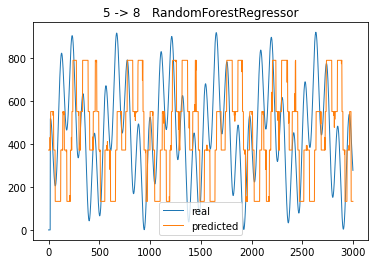

KNeighborsRegressor
MAPE: 2.3909946235391857


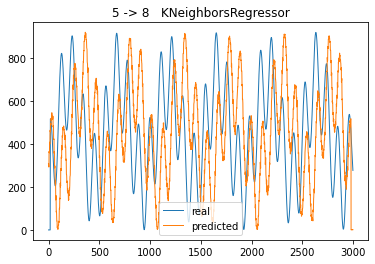

LinearRegression
MAPE: 2.382550486375779


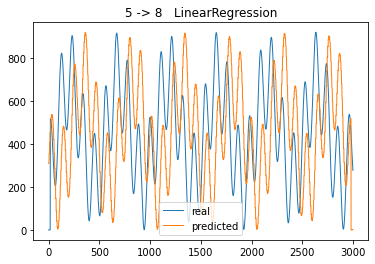

8 -> 5
RandomForestRegressor
MAPE: 2.0286208578309832


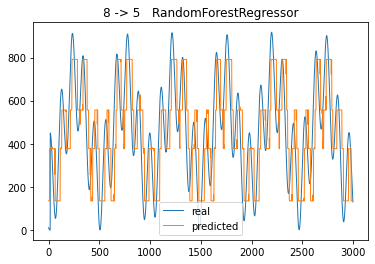

KNeighborsRegressor
MAPE: 2.207558688844711


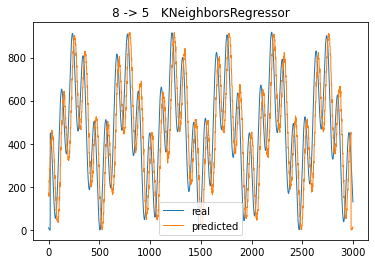

LinearRegression
MAPE: 2.2540163785177803


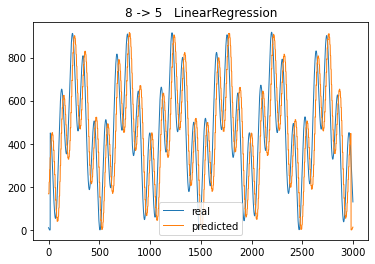

5 -> 12
RandomForestRegressor
MAPE: 3.1531162142723934


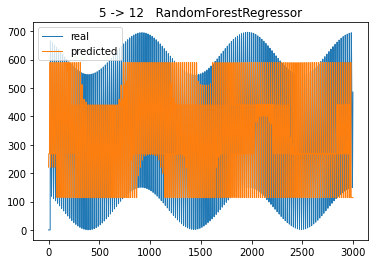

KNeighborsRegressor
MAPE: 4.165870031380973


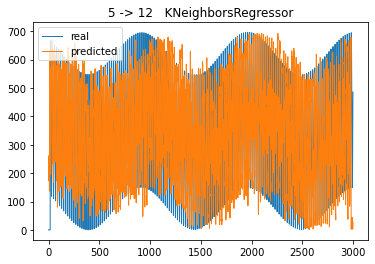

LinearRegression
MAPE: 3.6100163325750856


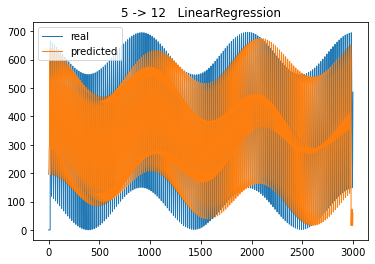

8 -> 12
RandomForestRegressor
MAPE: 196.9921030047419


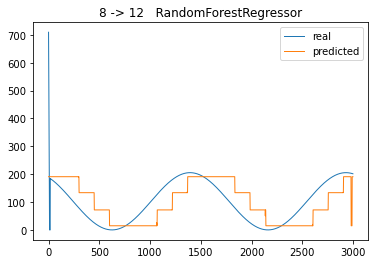

KNeighborsRegressor
MAPE: 468.3204508230349


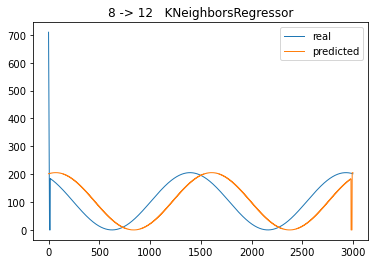

LinearRegression
MAPE: 460.85194474806696


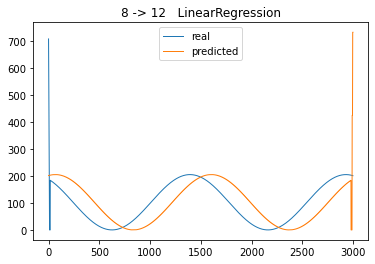

In [21]:
regressors = [
    RandomForestRegressor(max_depth=2, random_state=0),
    KNeighborsRegressor(n_neighbors=3),
    LinearRegression()
]

samples = 3000
for start, target in nodes:
    print(f'{start} -> {target}')
    # dane treningowe
    y_train = np.zeros(failure-1)
    X_train = np.zeros(failure-1)
    for i in range(0, failure-1):
        X_train[i] = data[i][start, target]
        y_train[i] = data[i+1][start, target]
    X_train = [i.flatten() for i in X_train ]

    # dane testowe
    X_test = np.zeros(iterations - failure)
    for i, traffic in enumerate(data_test):
        X_test[i] = traffic[start, target]
    y_test = X_test[1:samples]
    
    for model in regressors:
        print(model.__class__.__name__)
        model.fit(X_train, y_train)
        predictions = predict_multiple(model, X_test, 5, samples)
        mape = mean_absolute_percentage_error(y_test[50:], predictions[50:-1])
        print(f'MAPE: {mape}')
        prediction_graph(y_test[:], predictions[:-1], f'{start} -> {target}   {model.__class__.__name__}')  

In [8]:
len(predictions)

3000